In [149]:
import numpy as np 
import pathlib 
import h5py
import os
import datetime 
import pandas as pd
import warnings
import scipy
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn_image as isns
sns.set_theme()
import os
import dacite
import napari
import skimage.measure
import copy
import stumpy
import math

import space
import plotting
import temporal
import utilities
import filehandling
import utilities
import signal_analysis
import unit_conversion
# qgrid.enable() 
# import pandasgui
# import tabloo


# %matplotlib widget
# plt.ioff()
sns.set_context("paper")
sns.set_style("whitegrid")
matplotlib.rcParams['svg.fonttype'] = 'none'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
path = r"D:\Igor analyses\231005\2023-10-5_MP_1_1_FFF_RGBUV.h5"
example_data = filehandling.load_from_hdf5(path)
example_data_temp = filehandling.load_data(path)
pop_array = np.array(example_data.Averages0)

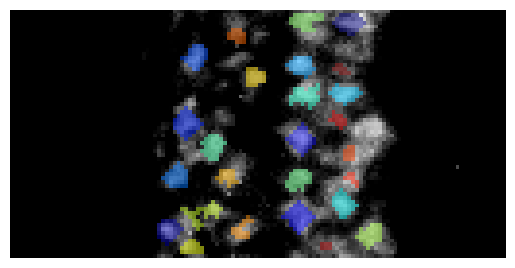

In [218]:
plotting.rois_overlay_object(example_data_temp)

In [203]:
np.min(example_data.ROIs)

-26.0

In [193]:
iter(plotting.fish_palette)

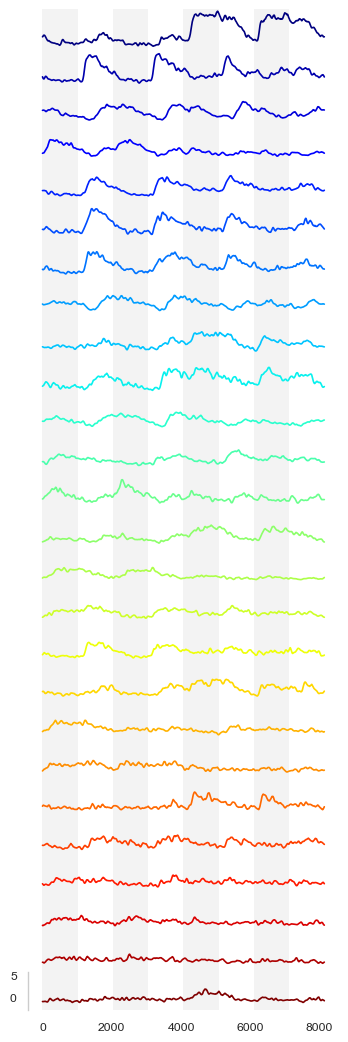

In [198]:
    plotting.plot_traces(pop_array, 4)

In [188]:
# Make stimulus movie 
stim_movie = plotting.basic_stim_overlay(example_data.AverageStack0_Chopped.T, 16)
# Check it with napari
napari.view_image(stim_movie)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 31.5, 249.5), zoom=1.8828999999999998, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(16.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 32.0, 1.0), (0.0, 64.0, 1.0), (0.0, 500.0, 1.0)), current_step=(16, 32, 250), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'stim_movie' at 0x26023f23a30>], scale_bar=ScaleBar(visible=False, colored=False, color=array([1., 0., 1., 1.], dtype=float32), ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, box=False, box_color=array([0. , 0. , 0. , 0.6], dtype=float32), unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ], dtype=float32), font_size=10.0, position=<TextOverlayPosition.TO

In [189]:
# Save it
write_gif(stim_movie, r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Lab meeting\Delay_off_example.gif", fps = 15)

In [174]:
import tifffile

In [177]:
tifffile.imwrite(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Lab meeting\Delay_off_example.tiff", plotting.basic_stim_overlay(example_data.AverageStack0_Chopped.T, 16))

## Notes 
Need a way to aggregate FFF data 

In [1451]:
files = filehandling.find_files_in(".h5", r"D:\Igor analyses", search_terms = ["FFF"], recursive=True) #"ColoursSWN"
files

[WindowsPath('D:/Igor analyses/231116/2023-11-16_MP_0_1_FFF_RGBU.h5'),
 WindowsPath('D:/Igor analyses/231116/2023-11-16_MP_0_2_FFF_RGBU.h5')]

In [1452]:
# Loop through, fetch traces and fetch positions
positions = []
avg_traces = []
# dict = {}
for file in files:
    experiment = filehandling.load_from_hdf5(file)
    positions.extend(list(experiment.Positions))
    avg_traces.extend(np.array(experiment.Averages0).T)

AttributeError: 'Data_hdf5' object has no attribute 'Positions'

In [1448]:
dict = {
    "positions" : positions,
    "avg_traces": avg_traces,
}
pd.DataFrame(dict)

,positions,avg_traces
0,18.0,"[-0.6461254, -0.6233819, -0.6006384, -0.577894..."
1,58.0,"[-0.36175573, -0.3623268, -0.36289787, -0.3634..."
2,64.0,"[0.12440379, 0.11749938, 0.11059499, 0.1059313..."
3,16.0,"[-0.12502621, -0.1217908, -0.1188237, -0.11585..."
4,25.0,"[-0.9145715, -0.92654324, -0.938515, -0.950486..."
5,70.0,"[-0.043734614, -0.04376376, -0.04629883, -0.04..."
6,20.0,"[-0.442793, -0.44372326, -0.4496616, -0.455599..."
7,23.0,"[-0.3629313, -0.36659136, -0.3702514, -0.37391..."
8,56.0,"[-1.3888261, -1.4000503, -1.4112744, -1.418903..."
9,72.0,"[0.31571344, 0.31814173, 0.32057, 0.32048, 0.3..."


In [1401]:
with h5py.File(files[1]) as HDF5_file:
    print(HDF5_file.keys())

<KeysViewHDF5 ['Averages0', 'OS_Parameters', 'ROIs', 'Snippets0', 'SnippetsTimes0', 'Stack_ave', 'Traces0_raw', 'Traces0_znorm', 'Triggertimes', 'Triggertimes_Frame', 'Triggervalues', 'correlation_projection', 'wDataCh0', 'wDataCh0_detrended', 'wParamsNum', 'wParamsStr']>


In [1392]:
dir(experiment)

['Averages0',
 'OS_Parameters',
 'Positions',
 'ROIs',
 'Snippets0',
 'SnippetsTimes0',
 'Stack_ave',
 'Traces0_raw',
 'Triggertimes',
 'Triggertimes_Frame',
 'Triggervalues',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'correlation_projection',
 'exp_date',
 'exp_time',
 'filename',
 'objectiveXYZ',
 'wDataCh0',
 'wDataCh0_detrended',
 'wParamsNum',
 'wParamsStr']

# Xinwei's FFF data

In [748]:
df_load = pd.read_csv(r"D:\Xinwei\BC_sy8_AZ\Data_all_steps_before.csv", header = None)
df_load_positions = pd.read_csv(r"D:\Xinwei\BC_sy8_AZ\Data_all_positions_before.csv", header = None)
# df_load = pd.read_csv(r"C:\Users\simen\Downloads\BC_sy8_AZ\Data_all_steps_before.csv", header = None)

In [749]:
df_load_positions

,0,1,2,3,4,5,6,7,8,9,...,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491
0,84,63,47,35,25,11,68,40,89,76,...,62,37,43,11,72,29,47,85,61,14


In [520]:
df_load

,0,1,2,3,4,5,6,7,8,9,...,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491
0,1.188573,-2.041044,0.025221,-0.281593,-2.645179,-1.513490,-1.429287,-1.006337,0.365523,-2.239525,...,-5.314616,-5.950717,-2.267205,-1.318470,-0.532067,-3.289409,-2.628193,-1.912535,-1.747944,-1.440787
1,1.184717,-2.040009,0.019503,-0.284348,-2.643849,-1.513005,-1.434350,-1.007524,0.369819,-2.235768,...,-5.310884,-5.949394,-2.267948,-1.317158,-0.535201,-3.296760,-2.626496,-1.910026,-1.745740,-1.445603
2,1.180862,-2.038973,0.013786,-0.287102,-2.642519,-1.512520,-1.439412,-1.008711,0.374116,-2.232010,...,-5.307151,-5.948071,-2.268692,-1.315845,-0.538335,-3.304111,-2.624798,-1.907516,-1.743536,-1.450419
3,1.177006,-2.037938,0.008068,-0.289856,-2.641189,-1.512034,-1.444475,-1.009899,0.378412,-2.228253,...,-5.303420,-5.946749,-2.269435,-1.314533,-0.541469,-3.311462,-2.623100,-1.905007,-1.741331,-1.455235
4,1.173151,-2.036902,0.002351,-0.292610,-2.639859,-1.511549,-1.449537,-1.011086,0.382708,-2.224495,...,-5.299687,-5.945426,-2.270179,-1.313220,-0.544603,-3.318813,-2.621402,-1.902497,-1.739127,-1.460050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1.362048,-2.650198,-0.273210,-1.268269,-3.046281,-1.842599,-2.043402,-0.977305,0.418229,-2.820358,...,-7.109386,-7.281529,-2.590840,-1.605603,-0.705909,-3.842203,-3.467534,-2.067788,-2.229878,-1.588436
15996,1.355308,-2.650150,-0.273640,-1.268183,-3.043122,-1.840384,-2.045954,-0.967771,0.420191,-2.818341,...,-7.106662,-7.279832,-2.586926,-1.598572,-0.708378,-3.847106,-3.466250,-2.069205,-2.226073,-1.592228
15997,1.348568,-2.650101,-0.274070,-1.268097,-3.039962,-1.838168,-2.048505,-0.958236,0.422154,-2.816324,...,-7.103937,-7.278133,-2.583013,-1.591542,-0.710847,-3.852010,-3.464966,-2.070621,-2.222268,-1.596021
15998,1.341828,-2.650053,-0.274500,-1.268011,-3.036802,-1.835952,-2.051057,-0.948702,0.424116,-2.814307,...,-7.101213,-7.276435,-2.579099,-1.584512,-0.713316,-3.856914,-3.463683,-2.072038,-2.218463,-1.599814


In [22]:
example_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000,-0.149329,-0.492011,0.761464,-0.581715,-0.337936,-0.978111,-0.292975,-0.327780,0.198904,...,-0.728039,-0.428983,-0.024269,-0.508074,-0.002569,-1.142661,-0.688076,-0.626923,-0.456328,-1.218890
1,0.001,-0.139823,-0.516856,0.769025,-0.578193,-0.339081,-0.978747,-0.296236,-0.330795,0.197720,...,-0.734834,-0.421576,-0.023243,-0.504485,-0.002984,-1.145862,-0.677046,-0.629378,-0.448027,-1.209651
2,0.002,-0.130317,-0.541702,0.776587,-0.574671,-0.340227,-0.979384,-0.299497,-0.333809,0.196535,...,-0.741627,-0.414170,-0.022217,-0.500897,-0.003398,-1.151012,-0.666016,-0.631834,-0.443341,-1.200412
3,0.003,-0.120810,-0.566548,0.784148,-0.571149,-0.341372,-0.980020,-0.302758,-0.336824,0.195351,...,-0.748422,-0.406764,-0.021190,-0.497309,-0.003813,-1.156162,-0.662805,-0.633476,-0.438654,-1.191173
4,0.004,-0.111304,-0.591394,0.791709,-0.567627,-0.341143,-0.980656,-0.306019,-0.339557,0.194167,...,-0.755216,-0.402000,-0.020164,-0.493720,-0.000220,-1.161312,-0.659594,-0.635118,-0.433968,-1.179683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,8.131,-0.106478,-0.409179,0.865947,-0.599064,-0.263063,-0.926787,-0.214149,-0.280311,0.041268,...,-0.497719,-0.415657,-0.164268,-0.613038,-0.239605,-1.086031,-0.625715,-0.578845,-0.460419,-1.234046
8132,8.132,-0.101055,-0.426363,0.867075,-0.600377,-0.262380,-0.928362,-0.221022,-0.282662,0.043549,...,-0.507522,-0.409349,-0.153824,-0.602917,-0.239743,-1.089158,-0.615610,-0.581477,-0.453286,-1.224819
8133,8.133,-0.095631,-0.447904,0.868203,-0.601690,-0.261697,-0.929937,-0.227894,-0.285013,0.042012,...,-0.511491,-0.403040,-0.150104,-0.590616,-0.239881,-1.092284,-0.605505,-0.584109,-0.446153,-1.215593
8134,8.134,-0.090208,-0.469444,0.861659,-0.603004,-0.261013,-0.931512,-0.234767,-0.287364,0.040475,...,-0.515460,-0.388893,-0.146383,-0.578314,-0.240020,-1.095411,-0.595399,-0.586740,-0.439020,-1.206367


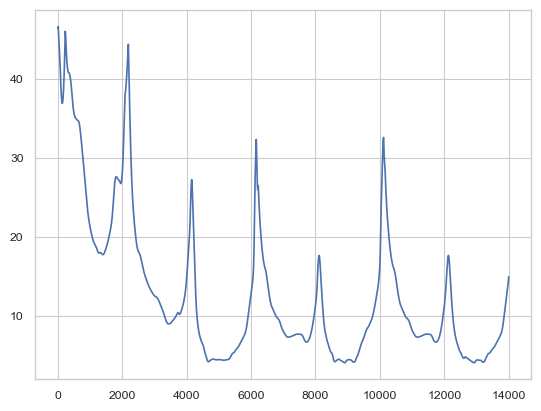

In [89]:
plt.plot(stumpy.stump(df_load[0], m=2000)[:, 0])

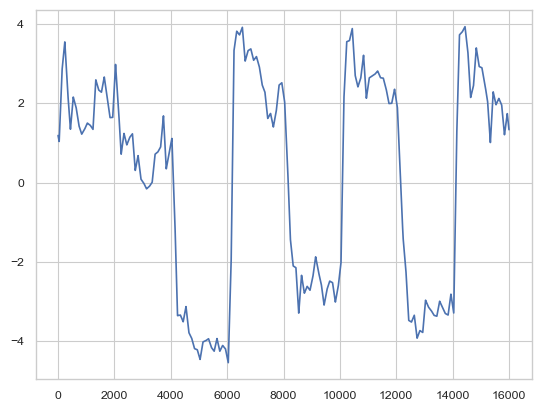

In [90]:
plt.plot(df_load[0])

In [271]:
len(example_data) / 4

2034.0

In [777]:
pop_array = example_data
smoothing_window = 1 # none
# First, smooth along time (you may use convolution for this)
pop_processed = np.apply_along_axis(np.convolve, 0, pop_array, np.ones(smoothing_window))
# Split according to RGBUV and response period 
pop_split_onoff_colour = pop_on_off_colour_split(pop_array, 4, 2, 2)
# Get the min and max locs
on_peak = np.argmax(pop_split_onoff_colour, axis = -1)[0, :, :] # This is correct
off_peak = np.argmax(pop_split_onoff_colour, axis = -1)[1, :, :] # This is correct
on_valley = np.argmin(pop_split_onoff_colour, axis = -1)[0, :, :]
off_valley = np.argmin(pop_split_onoff_colour, axis = -1)[1, :, :]
# Determine which in pair is the bigger value (peak or valley, for off or on)
off_peak[:, 3] > off_peak[:, 3]

array([False, False, False, False])

In [922]:
pop_on_off_colour_split(example_data, 4, 2, 2).shape

(2, 4, 25, 1017)

In [931]:
np.average(pop_on_off_colour_split(example_data, 4, 2, 2)[0,: , 3, 0:100], axis = 1)

array([0.5785502 , 1.04285972, 0.52585615, 0.84738491])

-1.1754959280000001
(4, 1017)
[0.00000000e+00 1.47565175e-03 2.95130349e-03 ... 2.99704870e+00
 2.99852435e+00 3.00000000e+00]


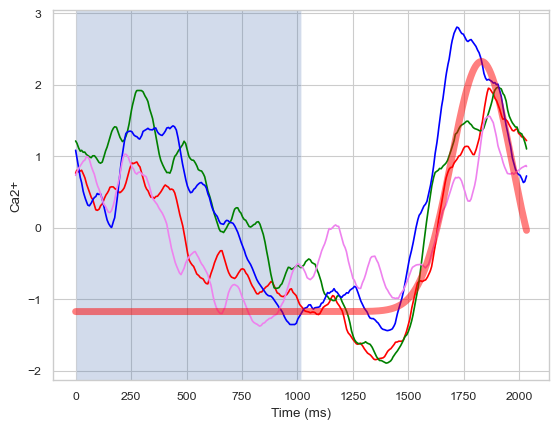

In [1228]:
cell_id = 3 
plot_cell_on_off_colour_timecourses(example_data, cell_id)

import numpy as np
import sympy as sp

x = sp.symbols('x')

# m = -.5
# b = 3.33
# gradient = 1
# x_step = m+2
A = 3.5
μ = 2.7
σ = .2
# k = 1
# x0 = -2



#linear_component = m * x * gradient + b
gaussian_component = A * sp.exp(-((x - μ)**2) / (2 * σ**2))

color_split = pop_on_off_colour_split(example_data, 4, 2, 2)[1, : , cell_id]
average_baseline = np.average(color_split[0, :100], axis = 0)
print(average_baseline)
print(color_split.shape)
template_signal = gaussian_component + average_baseline
template_signal_func = sp.lambdify(x, template_signal, 'numpy')

n = color_split.shape[-1] * 2  
x_values = np.linspace(0, 3, n)
template_signal_values = template_signal_func(x_values)
plt.plot(template_signal_values, c = 'red', ls = '-', lw = 5, alpha = 0.5)
print(x_values)

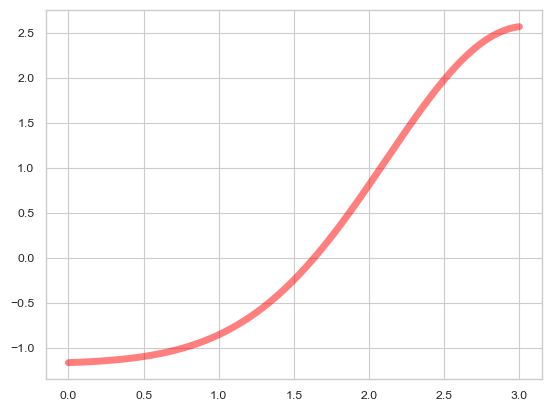

In [1259]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x = sp.symbols('x')
σ = sp.symbols('σ')

# Function to create a Gaussian component with amplitude scaling and skew parameter
def skewed_gaussian(x, A, μ, σ, skew):
    exp_term = sp.exp(-((x - μ)**2) / (2 * σ**2))
    skewed_component = A * exp_term * (1 + sp.erf(skew * (x - μ) / (σ * sp.sqrt(2))))
    return skewed_component

# Example parameters
A = 3.5
μ = 2.7
σ_value = 1.0  # Set your desired value for the standard deviation
skew_value = 0.5  # Set your desired value for the skewness

# Gaussian component with amplitude scaling and skew parameter
gaussian_component = skewed_gaussian(x, A, μ, σ_value, skew_value)

# Additional code for plotting the template signal
cell_id = 3
color_split = pop_on_off_colour_split(example_data, 4, 2, 2)[1, :, cell_id]
average_baseline = np.average(color_split[0, :100], axis=0)

template_signal = gaussian_component + average_baseline
template_signal_func = sp.lambdify(x, template_signal, 'numpy')

# Vectorize the lambdified function
template_signal_func_vectorized = np.vectorize(template_signal_func)

# Set the number of points for the plot
n = color_split.shape[-1] * 2
x_values = np.linspace(0, 3, n)
template_signal_values = template_signal_func_vectorized(x_values)

# Plot the template signal
plt.plot(x_values, template_signal_values, c='red', ls='-', lw=5, alpha=0.5)
plt.show()


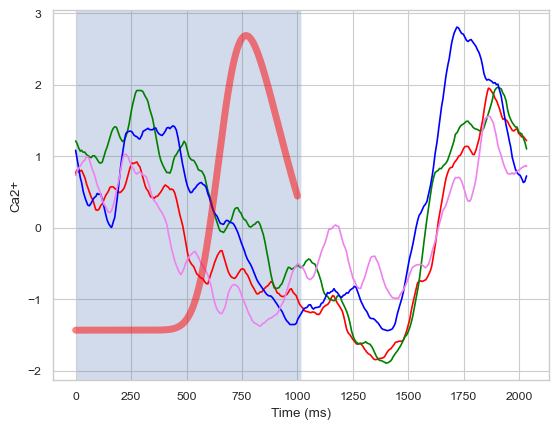

In [1294]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

cell_id = 3 
plot_cell_on_off_colour_timecourses(example_data, cell_id)

x = sp.symbols('x')
σ = sp.symbols('σ')

# Function to create a Gaussian component with amplitude scaling and skew parameter
def skewed_gaussian(x, A, μ, σ, skew):
    exp_term = sp.exp(-((x - μ)**2) / (2 * σ**2))
    skewed_component = A * exp_term * (1 + sp.erf(skew * (x - μ) / (σ * sp.sqrt(2))))
    return skewed_component

# Example parameters
A = 2.5
μ = 1
σ_value = 250  # Set your desired value for the standard deviation
skew_value = 3  # Set your desired value for the skewness

# Function to create the template signal with specified length and peak position
def create_template_signal(length, peak_position, A, μ, σ, skew):
    x_values = np.linspace(0, length, length)
    gaussian_component = skewed_gaussian(x, A, peak_position, σ, skew)
    
    # Additional code for plotting the template signal
    color_split = pop_on_off_colour_split(example_data, 4, 2, 2)[1, :, cell_id]
    average_baseline = np.average(color_split[0, :500], axis=0)

    template_signal = gaussian_component + average_baseline
    template_signal_func = sp.lambdify(x, template_signal, 'numpy')

    # Vectorize the lambdified function
    template_signal_func_vectorized = np.vectorize(template_signal_func)

    template_signal_values = template_signal_func_vectorized(x_values)

    return x_values, template_signal_values

# Set the length and peak position for the template signal
length = 1000  # Set your desired length
peak_position = 650  # Set your desired peak position

# Create the template signal
x_values, template_signal_values = create_template_signal(length, peak_position, A, μ, σ_value, skew_value)

# Plot the template signal
plt.plot(x_values, template_signal_values, c='red', ls='-', lw=5, alpha=0.5)
plt.show()


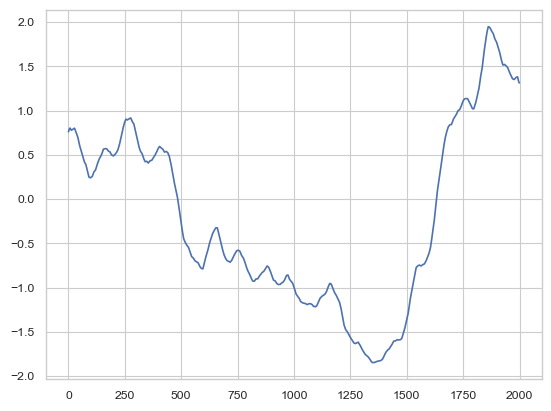

In [1309]:
plt.plot(example_data[3][:2000])

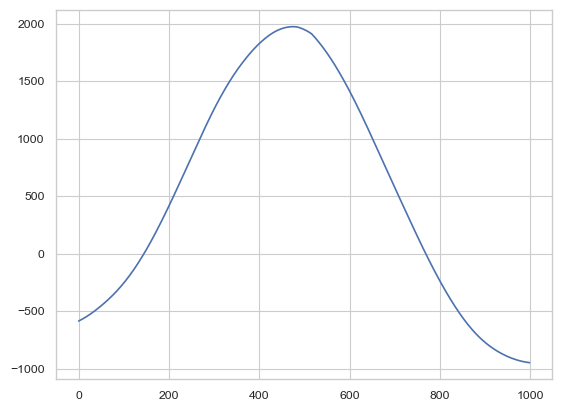

In [1325]:
plt.plot(scipy.signal.correlate(template_signal_values, example_data[3][1000:2032], mode = "same"))

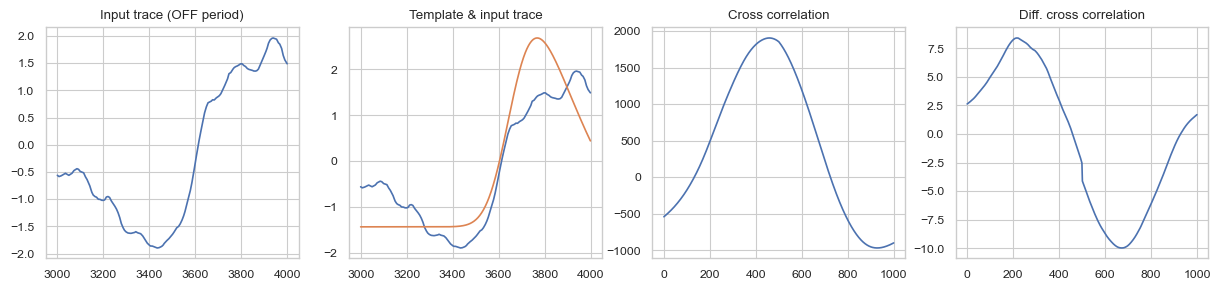

In [1377]:
# Build a test bed
cell_id = 3
extract_range = (3000, 4000)
test_signal = example_data[cell_id][extract_range[0]:extract_range[1]]
template = template_signal_values
cross_correlation = scipy.signal.correlate(template_signal_values, example_data[cell_id][extract_range[0]:extract_range[1]], mode = "same")
fig, ax = plt.subplots(1, 4, figsize = (15, 3))
ax[0].plot(test_signal)
ax[1].plot(test_signal)
ax[1].plot(np.arange(extract_range[0], extract_range[1]), template)
ax[2].plot(cross_correlation)
ax[3].plot(np.gradient(cross_correlation))
titles = ["Input trace (OFF period)", "Template & input trace", "Cross correlation", "Diff. cross correlation"]
for n, i in enumerate(titles):
    ax[n].set_title(i)

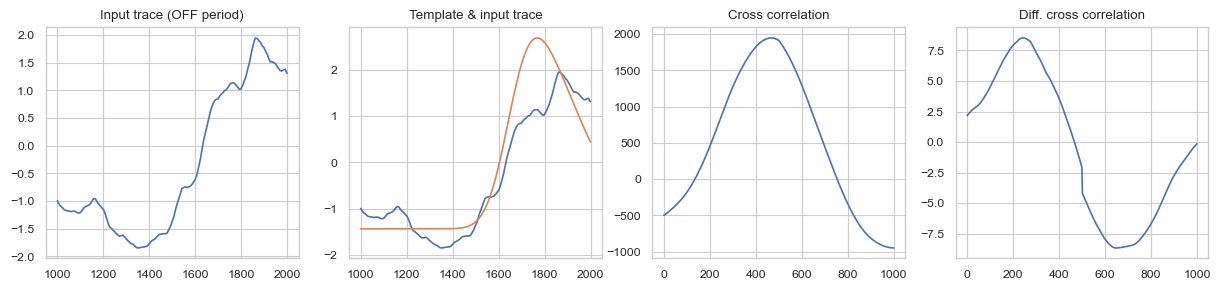

In [1375]:
# Build a test bed
cell_id = 3
extract_range = (1000, 2000)
test_signal = example_data[cell_id][extract_range[0]:extract_range[1]]
template = template_signal_values
cross_correlation = scipy.signal.correlate(template_signal_values, example_data[cell_id][extract_range[0]:extract_range[1]], mode = "same")
fig, ax = plt.subplots(1, 4, figsize = (15, 3))
ax[0].plot(test_signal)
ax[1].plot(test_signal)
ax[1].plot(np.arange(extract_range[0], extract_range[1]), template)
ax[2].plot(cross_correlation)
ax[3].plot(np.gradient(cross_correlation))
titles = ["Input trace (OFF period)", "Template & input trace", "Cross correlation", "Diff. cross correlation"]
for n, i in enumerate(titles):
    ax[n].set_title(i)

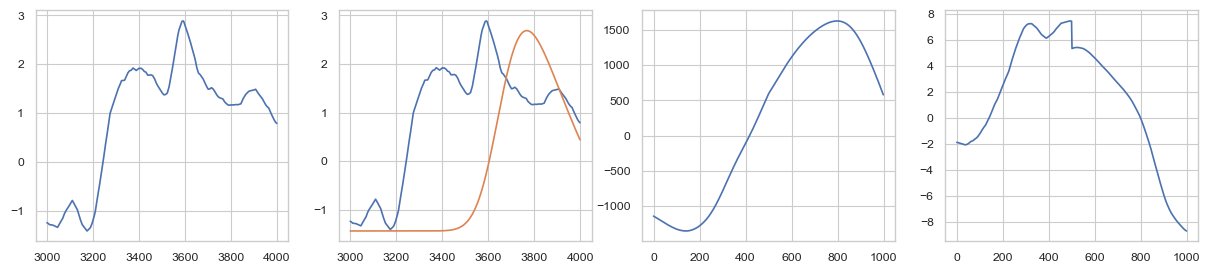

In [1372]:
# Build a test bed
cell_id = 5
extract_range = (3000, 4000)
test_signal = example_data[cell_id][extract_range[0]:extract_range[1]]
template = template_signal_values
cross_correlation = scipy.signal.correlate(template_signal_values, example_data[cell_id][extract_range[0]:extract_range[1]], mode = "same")
fig, ax = plt.subplots(1, 4, figsize = (15, 3))
ax[0].plot(test_signal)
ax[1].plot(test_signal)
ax[1].plot(np.arange(extract_range[0], extract_range[1]), template)
ax[2].plot(cross_correlation)
ax[3].plot(np.gradient(cross_correlation))
titles = ["Input trace (OFF period)", "Template & input trace", "Cross correlation", "Diff. cross correlation"]
for n, i in enumerate(titles):
    ax[n].set_title(i)

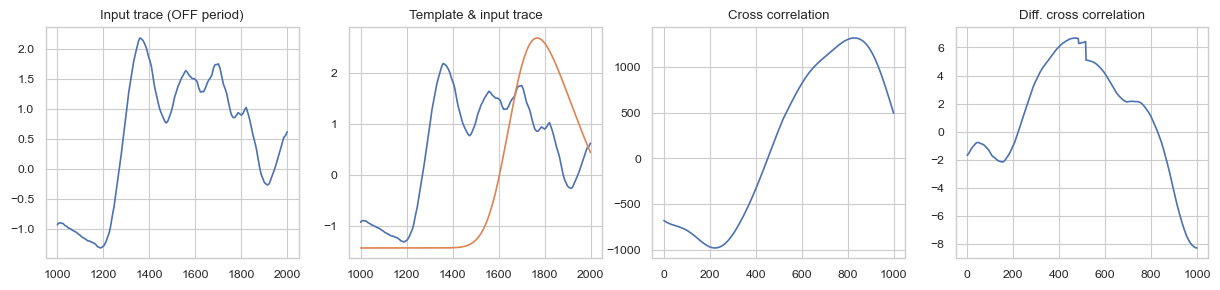

In [1376]:
# Build a test bed
cell_id = 10
extract_range = (1000, 2000)
test_signal = example_data[cell_id][extract_range[0]:extract_range[1]]
template = template_signal_values
cross_correlation = scipy.signal.correlate(template_signal_values, example_data[cell_id][1000:2032], mode = "same")
fig, ax = plt.subplots(1, 4, figsize = (15, 3))
ax[0].plot(test_signal)
ax[1].plot(test_signal)
ax[1].plot(np.arange(extract_range[0], extract_range[1]), template)
ax[2].plot(cross_correlation)
ax[3].plot(np.gradient(cross_correlation))
titles = ["Input trace (OFF period)", "Template & input trace", "Cross correlation", "Diff. cross correlation"]
for n, i in enumerate(titles):
    ax[n].set_title(i)

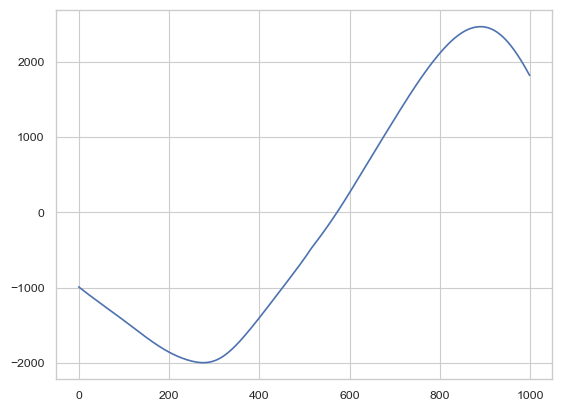

In [1326]:
plt.plot(scipy.signal.correlate(template_signal_values, example_data[2][1000:2032], mode = "same"))

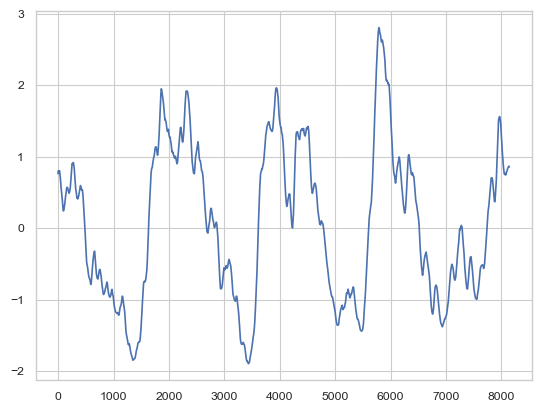

In [1291]:
plt.plot(example_data[3])

In [1247]:
template_signal_func(6)

-1.146766317133952

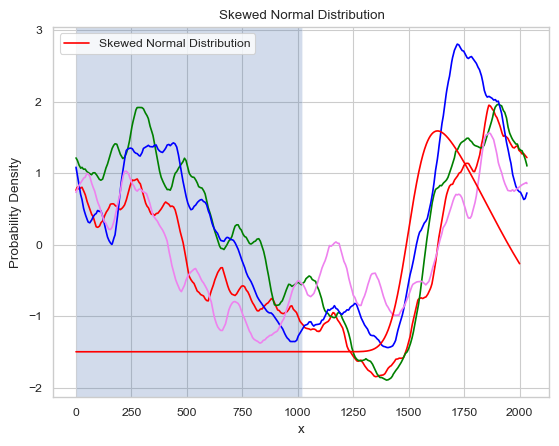

In [1183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
plot_cell_on_off_colour_timecourses(example_data, cell_id)

def fit_template(input_signal):
    return 1
# Parameters
A = 15 # Amplitude
mu = 1500  # Mean
sigma = 350  # Standard deviation
alpha = 5  # Skewness parameter

# Generate data
x = np.linspace(0, 2000, 1000)
y = A * 100 * skewnorm.pdf(x, alpha, loc=mu, scale=sigma) - 1.5

# Plot the skewed normal distribution
plt.plot(x, y, label='Skewed Normal Distribution')
plt.title('Skewed Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [1010]:
average_baseline

array([-0.85242819, -0.85147209, -0.85051594, ...,  0.98183805,
        0.97898094,  0.97391834])

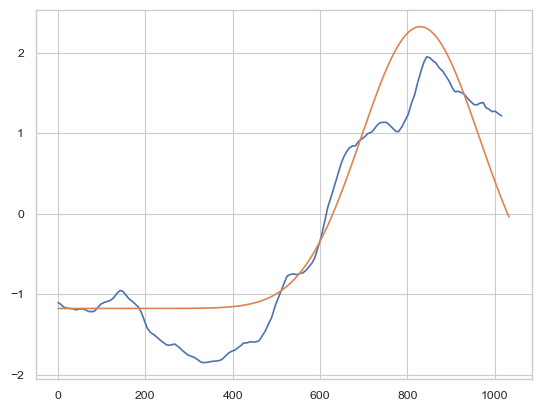

In [1039]:
plt.plot(color_split[0])
plt.plot(template_signal_values[1000:])

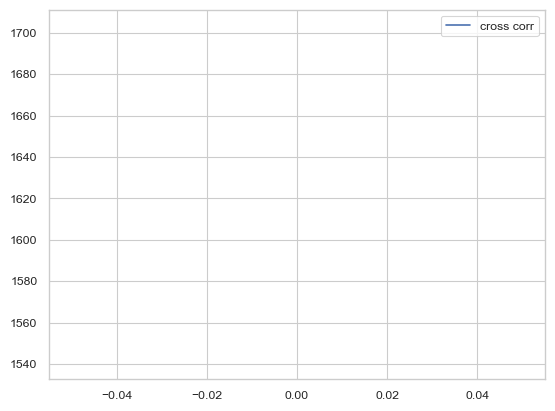

In [1056]:
plt.plot(np.correlate(template_signal_values[1017:], color_split[0]), label = "cross corr")
# plt.plot(template_signal_values[1017:] - color_split[0], label = "cross corr")
plt.legend()

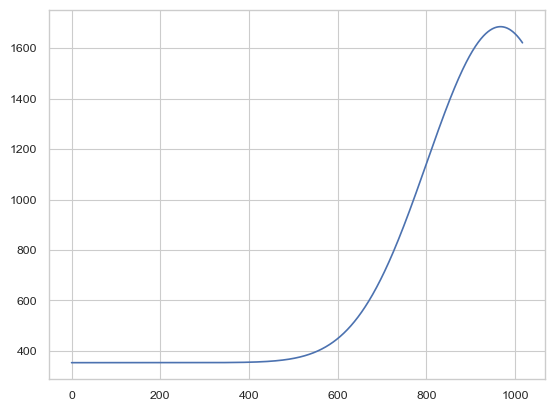

In [1076]:
plt.plot(np.correlate(template_signal_values, color_split[0]))

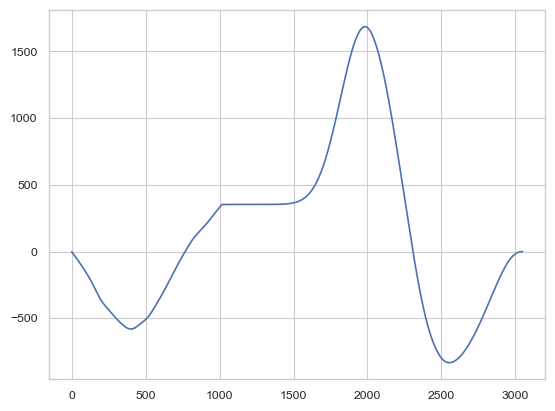

In [1085]:
plt.plot(scipy.signal.correlate(template_signal_values, color_split[0]))

In [1072]:
# np.corrcoef(template_signal_values[1017:], color_split[0])

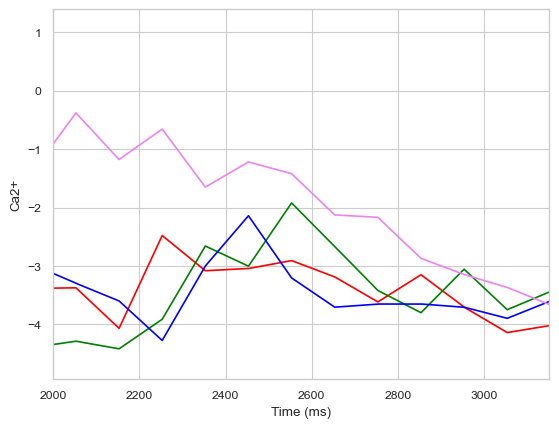

In [724]:
plot_cell_on_off_colour_timecourses(df_load, 795, xlim = (2000, 3150))

In [725]:
pop_on_off_colour_index(example_data, 4, 2, 2).shape

(4, 25)

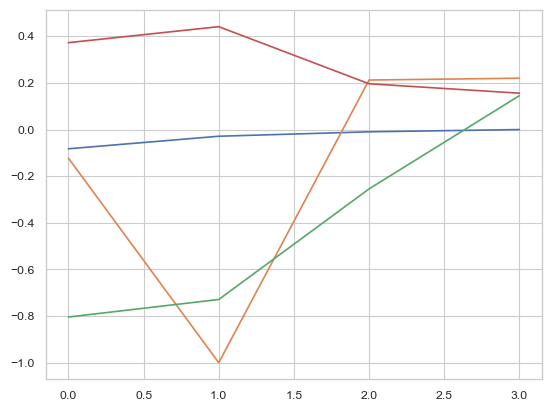

In [731]:
plt.plot(pop_on_off_colour_index(example_data, 4, 2, 2)[:, [0, 1, 2, 3]])

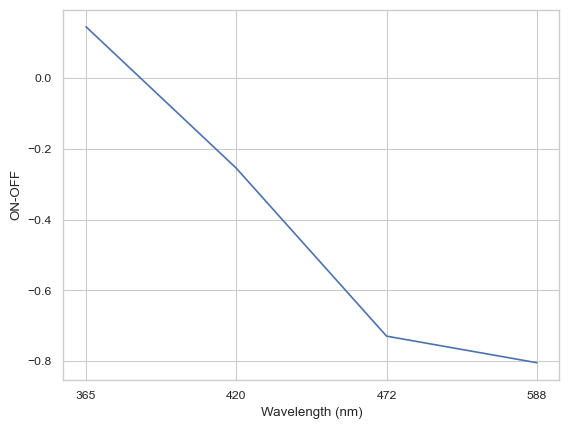

In [747]:

plot_on_off_index_tuning(example_data, 2)

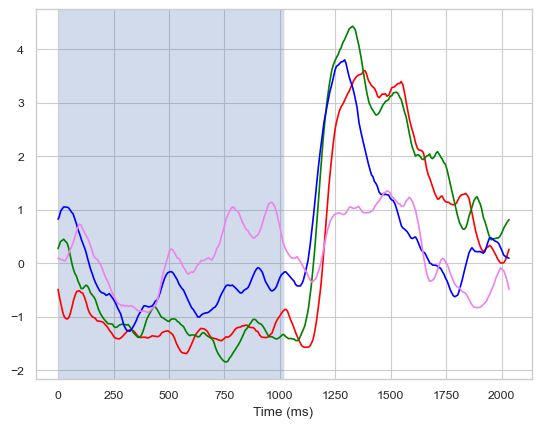

In [743]:
plot_on_off_colour_timecourses(example_data, 2)

In [451]:
# Find most extreme index for ON and OFF by colour
pop_split_onoff_colour = pop_on_off_colour_split(example_data, 4, 2, 2)
np.argmax(pop_split_onoff_colour, axis = -1)[0, :, 3] # This is correct

array([276, 283, 439, 226], dtype=int64)

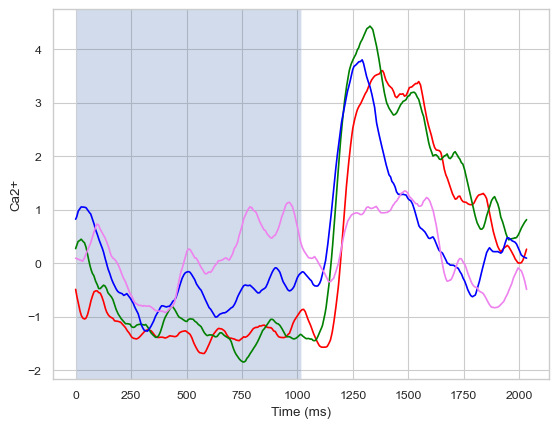

In [ ]:

plot_cell_on_off_colour_timecourses(example_data, 2, xlim =)

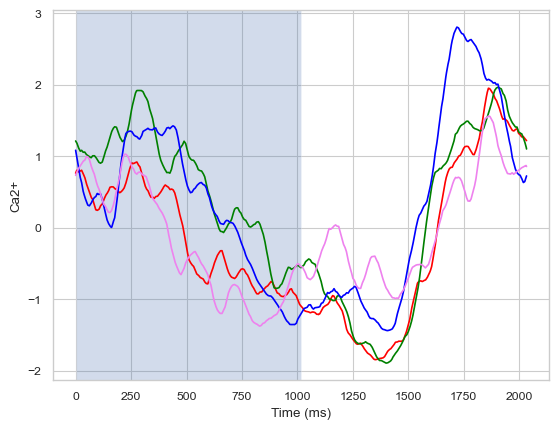

In [517]:
plot_cell_on_off_colour_timecourses(example_data, 3)

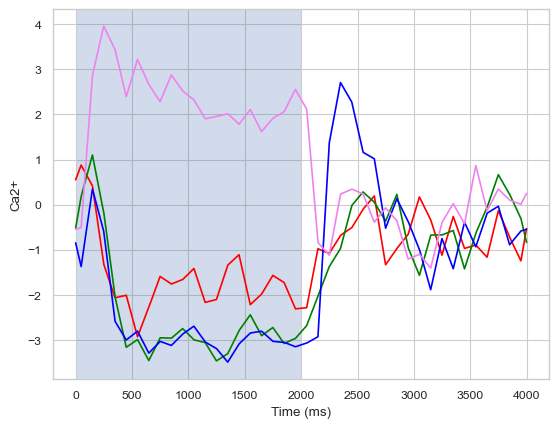

In [518]:
plot_cell_on_off_colour_timecourses(df_load, 50)

8385


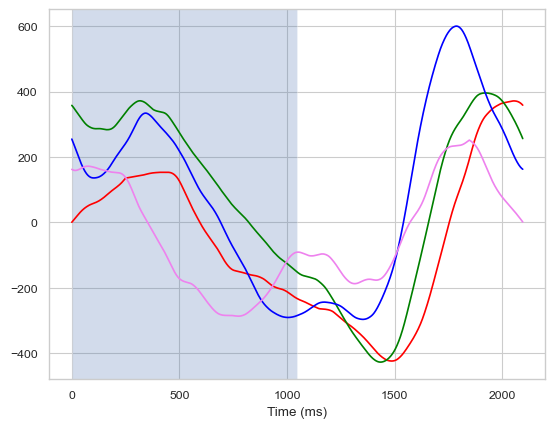

In [502]:
test =  (np.apply_along_axis(np.convolve, 0, example_data, np.ones(250)))
print(len(test))
plot_on_off_colour_timecourses(test, 3)


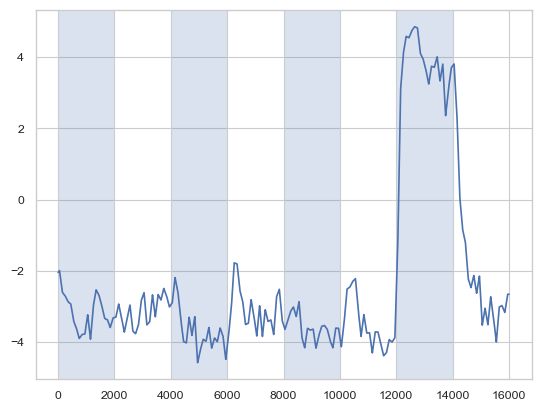

In [499]:
plt.plot(df_load[1])
for i in range(4):
    plt.axvspan(4000*i, (4000*i)+2000, alpha = 0.2)


In [37]:
2000 * 3

6000

In [24]:
4 * 4

16

In [25]:
16000 / 16

1000.0

# Time series analysis

In [2]:
files = filehandling.find_files_in(".h5", r"D:\Igor analyses", recursive=True, search_terms = ['STAramp'])
print(*files, sep = "\n")

D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_B_0.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_G.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_R.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_UV_0.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_B.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_G.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_R.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_UV.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_B.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_G.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_R.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_UV.h5
D:\Igor analyses\230404\2023-4-4_SMP_1_1_STAramp_UV_0.h5
D:\Igor analyses\230502\2023-5-2_SMP_0_0_STAramp_R_0.h5
D:\Igor analyses\230502\2023-5-2_SMP_0_0_STAramp_UV_0.h5
D:\Igor analyses\230502\2023-5-2_SMP_0_1_STAramp_R_0.h5
D:\Igor analyses\230503\2023-5-3_SMP_0_0_STAramp_R_0.h5
D:\Igor analyses\230505\2023-5-5_SMP_0_3_STAramp_G.

In [43]:
conditions = [1.18, 2.37, 4.74, 9.48, 18.96, 37.93]
df_res = signal_analysis.stim_phase_df(files, conditions, 50, 3, stat = np.var)


In [ ]:
df_res.sort_values("stat_diff_abs")

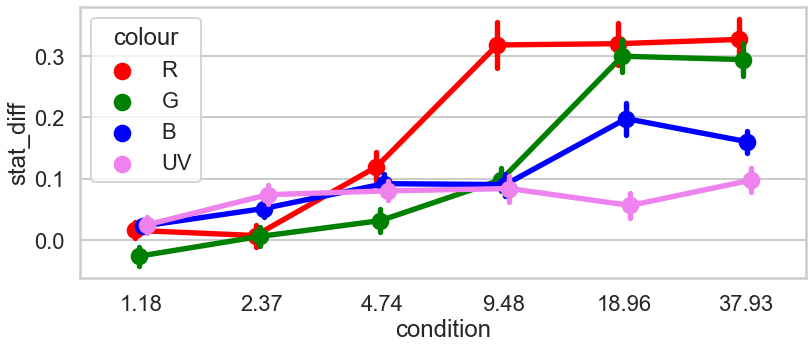

In [44]:
fig, ax = plt.subplots(1, figsize=(13,5))
chromatic_palette = ['red', 'green', "blue", 'violet']
chromatic_hues = ["R", "G", "B", "UV"]
# sns.pointplot(data = df_res, x = 'condition', y = "stat", hue = 'colour', 
#     hue_order = chromatic_hues, palette=chromatic_palette,
#      dodge=True,  errorbar="se", ax = ax[0])
# sns.pointplot(data = df_res, x = 'condition', y = "stat_diff_abs", hue = 'colour', 
#     hue_order = chromatic_hues, palette=chromatic_palette,
#      dodge=True,  errorbar="se", ax = ax[1])
sns.pointplot(data = df_res, x = 'condition', y = "stat_diff", hue = 'colour', 
    hue_order = chromatic_hues, palette=chromatic_palette,
     dodge=True,  errorbar="se", ax = ax)
plt.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\Life Sciences PhD Careers Symposium 2023\size_preference_lineplot.svg")

In [3]:
conditions = [1.18, 2.37, 4.74, 9.48, 18.96, 37.93]

In [72]:
'D:/Igor analyses/230323/2023-5-5_SMP_0_3_STAramp_R.h5.h5'

WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_1_STAramp_B_0.h5')

['Averages0', 'OS_Parameters', 'ROIs', 'Snippets0', 'SnippetsTimes0', 'Stack_ave', 'Traces0_raw', 'Triggertimes', 'Triggertimes_Frame', 'Triggervalues', '__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'exp_date', 'exp_time', 'filename', 'objectiveXYZ', 'wDataCh0', 'wDataCh0_detrended', 'wParamsNum', 'wParamsStr']


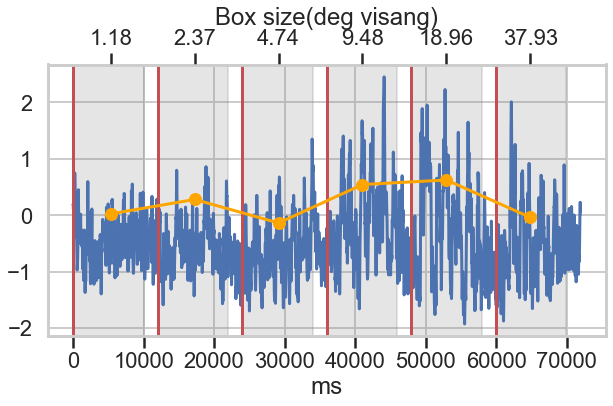

In [64]:
# file = filehandling.load_from_hdf5(files[0])
file = filehandling.load_from_hdf5(r"D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_B.h5")
# file = filehandling.load_from_hdf5(r"D:\Igor analyses\230505\2023-5-5_SMP_0_3_STAramp_UV.h5")
print(dir(file))
roi = 4 # 4
# Import the variables
triggers_time = file.Triggertimes
linespeed = file.OS_Parameters[56]
traces = file.Averages0
# Determine, on average, when in the loop the trigger occurs
avg_trig_times = np.average(np.split(triggers_time, 3), axis = 0)
avg_trig_times = avg_trig_times - avg_trig_times[0] 
avg_trig_times_ms = np.round(avg_trig_times / linespeed, 0) # round so we get an integer index 
# Account for period of no stimulus 
inter_phase_durS = 2
inter_phase_durMs = np.round(inter_phase_durS / linespeed, 0).astype(int)
# Run on one case 
stat = signal_analysis.stimphase_stat_diff(traces[:, roi], avg_trig_times_ms, 50, linespeed, pause_dur = inter_phase_durMs, stat = np.average, avgd_over = 3, plot = True)
plt.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\Life Sciences PhD Careers Symposium 2023\size_pref_Blue.svg")

In [17]:
import matplotlib.pylab as pl

In [35]:
phase_nth_trigs = avg_trig_times_ms[::50].astype(int)
stim_dur = np.average(np.diff(phase_nth_trigs, axis = 0)) - inter_phase_durMs

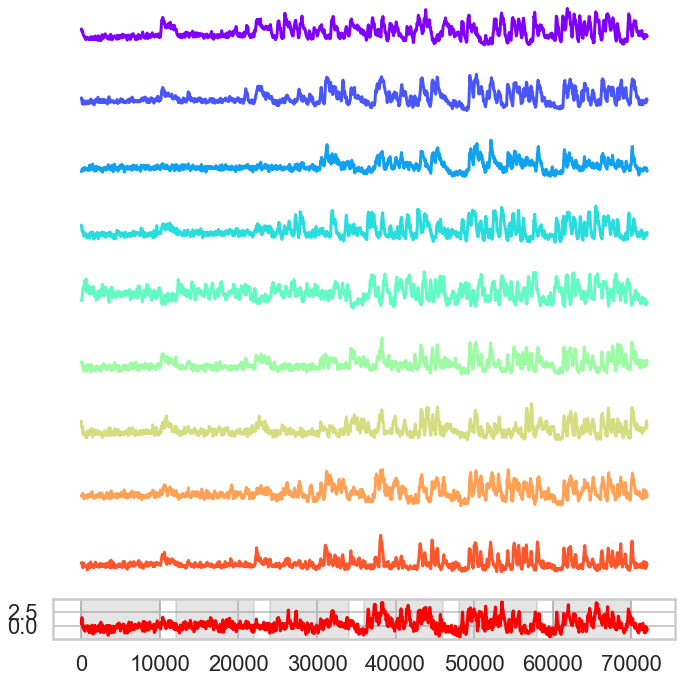

In [92]:
plotlist = [0, 3]
fig, ax = plt.subplots(len(plotlist), figsize = (10, 10))
to_plot = []
colors = pl.cm.rainbow(np.linspace(0,1,len(plotlist)))
for n, i in enumerate(plotlist):
    trace = traces[:, i]
    ax[n].plot(trace, c = colors[n])
    ax[n].axis("off")
for i in phase_nth_trigs: 
    ax[n].axvspan(i, i + stim_dur, alpha = 0.2, color = 'gray')
ax[n].axis("on")
plt.tight_layout()
plt.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\Life Sciences PhD Careers Symposium 2023\size_preference.svg")

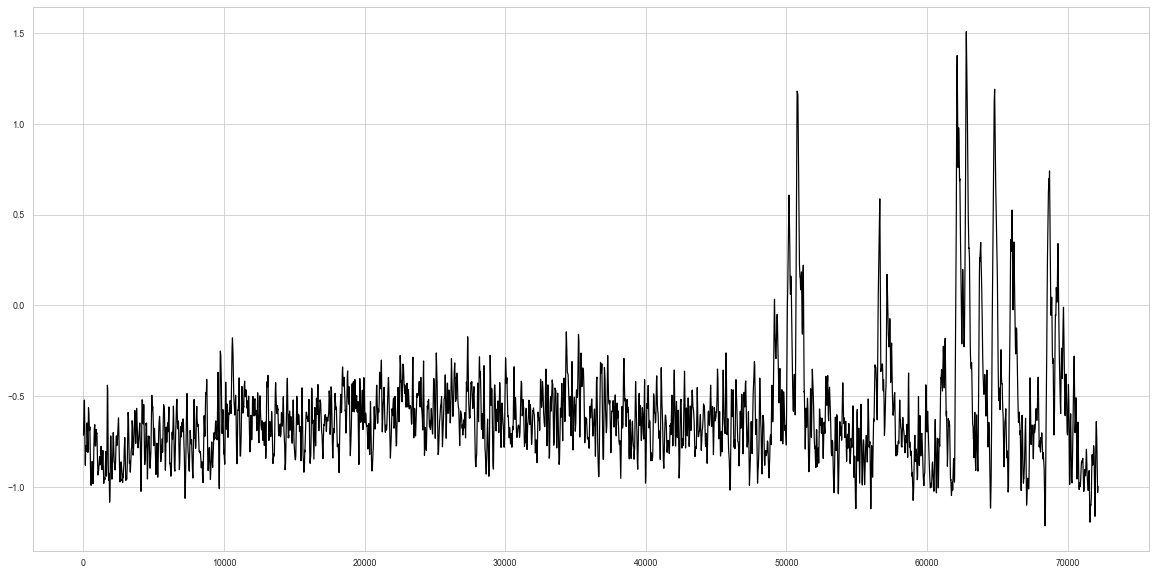

In [47]:
plt.subplots(figsize= (20,10))
plt.plot(curr_file.Averages0[:, 1], alpha = 1, c = 'black')

In [18]:
stat

array([1.89278103, 1.43594393, 1.45706266, 1.37873826, 2.40808166,
       2.46642573])

In [10]:
def stimphase_stat(trace, trigger_times, phase_trignum, linespeed, stat = np.std, plot = False, **kwargs):
    """
    Calculate statistics on a signal trace for each stimulus phase.

    Parameters
    ----------
    trace : array
        Signal trace.
    trigger_times : array
        Array of trigger times.
    phase_trignum : int
        Number of triggers per phase.
    linespeed : float
        Speed of the line.
    stat : function
        Function to calculate statistics on signal trace.
    plot : bool
        Whether to plot the signal trace.

    Returns
    -------
    stats : array
        Array of statistics for each stimulus phase.

    Notes:
    ------
    We operate in linescan-speed as our time-domain, but everything is scaled by 'linespeed' thus yielding ms (i think...)
    - trace: 1D numpy array, 2P data 
    - trigger_times: 1D array where indeces indicate when nth trigger occured
    - phase_trignum: how many triggers per stimulus phase
    """
    if 'pause_dur' in kwargs:
        inter_phase_dur = kwargs['pause_dur']
    else:
        inter_phase_dur = 0
    if 'avgd_over' in kwargs:
        repeats = kwargs["avgd_over"]
    else:
        repeats = 1
    # Get the nth triggers for sectioning out indeces in signal trace
    phase_nth_trigs = trigger_times[::phase_trignum].astype(int)
    stim_dur = np.average(np.diff(phase_nth_trigs, axis = 0)) - inter_phase_dur
    # Get stats within those durations 
    trial_split = np.split(trace, phase_nth_trigs[1:])
    # Caøculate statistic over given intervals
    stats = np.empty(len(trial_split))
    counter_stats = np.empty(len(trial_split))
    if inter_phase_dur == 0:
        for n, i in enumerate(trial_split):
            stats[n] = stat(i)
    else: 
        for n, i in enumerate(trial_split):
            stats[n] = stat(i[:-inter_phase_dur])
            if "percentdiff_threshold" in kwargs:
                inter_phase = i[len(i)-inter_phase_dur:]
                counter_stats[n] = stat(inter_phase)
                if stat == np.std and repeats > 1: # stupid solution but cannot be asked
                    counter_stats[n] = np.array(counter_stats[n]) * np.sqrt(repeats)
                if np.sum(np.abs(stats[n])) > np.sum(np.abs(counter_stats[n])):
                    percentage_difference_arr = np.abs( 1 - np.divide(counter_stats, stats))
                else:
                    percentage_difference_arr = np.abs( 1 - np.divide(stats, counter_stats))
                if np.all(percentage_difference_arr < kwargs["percentdiff_threshold"]):
                    stats = np.repeat(np.nan, len(stats))
    if stat == np.std and repeats > 1:
        stats = np.array(stats) * np.sqrt(repeats)
        # In this special case, some mathemagical thing occurs where due to taking 
        # the STD of a signal thats expressed in SD and is averaged repeatedly, the
        # SD of that averaged signal will be scaled by 1/sqrt(n_repeats)            
    else:
        stats = np.array(stats)
    if plot == True:
        # Plotting
        fig, ax = plt.subplots(figsize = (10, 5))
        # First axis 
        ax.plot(trace)
        for i in phase_nth_trigs: 
            ax.axvline(i, c='r')
            ax.axvspan(i, i + stim_dur, alpha = 0.2, color = 'gray')
        ax.set_xlabel(f"ms")
        # Second axis
        secax = ax.twiny()
        secax.plot(stats, 'o-', c='orange')
        secax.set_xticks([0,1,2,3,4,5])
        secax.set_xticklabels([1.18, 2.37, 4.74, 9.48, 18.96, 37.93])
        secax.set_xlabel("Box size(deg visang)")
        secax.set_xlim(np.array([-.75, 5.9]))
        secax.grid(False)
    return stats

def stimphase_stat_diff(trace, trigger_times, phase_trignum, linespeed, stat = np.std, return_both = False, plot = False, **kwargs):
    """
    Calculate difference in statsitic between baseline period and response periods.

    Parameters
    ----------
    trace : array
        Signal trace.
    trigger_times : array
        Array of trigger times.
    phase_trignum : int
        Number of triggers per phase.
    linespeed : float
        Speed of the line.
    stat : function
        Function to calculate statistics on signal trace.
    plot : bool
        Whether to plot the signal trace.

    Returns
    -------
    stats : array
        Array of statistics for each stimulus phase.

    Notes:
    ------
    We operate in linescan-speed as our time-domain, but everything is scaled by 'linespeed' thus yielding ms (i think...)
    - trace: 1D numpy array, 2P data 
    - trigger_times: 1D array where indeces indicate when nth trigger occured
    - phase_trignum: how many triggers per stimulus phase
    """
    if 'pause_dur' in kwargs:
        inter_phase_dur = kwargs['pause_dur']
    else:
        inter_phase_dur = 0
    if 'avgd_over' in kwargs:
        repeats = kwargs["avgd_over"]
    else:
        repeats = 1
    # Get the nth triggers for sectioning out indeces in signal trace
    phase_nth_trigs = trigger_times[::phase_trignum].astype(int)
    stim_dur = np.average(np.diff(phase_nth_trigs, axis = 0)) - inter_phase_dur
    # Get stats within those durations 
    trial_split = np.split(trace, phase_nth_trigs[1:])
    # Caøculate statistic over given intervals
    stats_response = np.empty(len(trial_split))
    stats_baseline = np.empty(len(trial_split))
    counter_stats = np.empty(len(trial_split))
    if inter_phase_dur == 0:
        raise AttributeError("No baseline duration as defined by inter_phase_dur")
    else: 
        for n, i in enumerate(trial_split):
            stats_response[n] = stat(i[:-inter_phase_dur])
            stats_baseline[n] = stat(i[-inter_phase_dur:])
    if stat == np.std and repeats > 1:
        stats_response = np.array(stats_response) * np.sqrt(repeats)
        stats_baseline = np.array(stats_baseline) * np.sqrt(repeats)
        # In this special case, some mathemagical thing occurs where due to taking 
        # the STD of a signal thats expressed in SD and is averaged repeatedly, the
        # SD of that averaged signal will be scaled by 1/sqrt(n_repeats)            
    else:
        stats_response = np.array(stats_response)
        stats_baseline = np.array(stats_baseline)
    difference = stats_response - stats_baseline
    if plot == True:
        # Plotting
        fig, ax = plt.subplots(figsize = (10, 5))
        # First axis 
        ax.plot(trace)
        for i in phase_nth_trigs: 
            ax.axvline(i, c='r')
            ax.axvspan(i, i + stim_dur, alpha = 0.2, color = 'gray')
        ax.set_xlabel(f"ms")
        # Second axis
        secax = ax.twiny()
        secax.plot(difference, 'o-', c='orange')
        secax.set_xticks([0,1,2,3,4,5])
        secax.set_xticklabels([1.18, 2.37, 4.74, 9.48, 18.96, 37.93])
        secax.set_xlabel("Box size(deg visang)")
        secax.set_xlim(np.array([-.75, 5.9]))
        secax.grid(False)
    if return_both == True:
        return stats_response, stats_baseline
    else:
        return difference

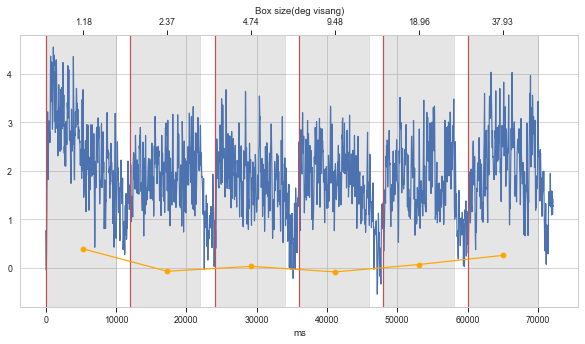

In [28]:
difference = signal_analysis.stimphase_stat_diff(traces[:, 10], avg_trig_times_ms, 50, linespeed, 
pause_dur = inter_phase_durMs, stat = np.var, avgd_over = 3, plot = True, inter_threshold = True,
percentdiff_threshold = 0.9)

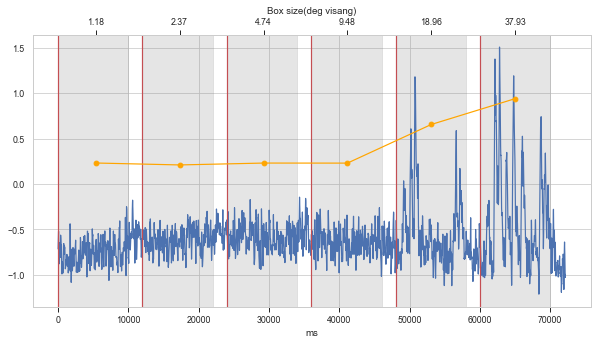

In [93]:
stat = signal_analysis.stimphase_stat(traces[:, roi], avg_trig_times_ms, 50, linespeed, pause_dur = inter_phase_durMs, stat = np.std, avgd_over = 3, plot = True)

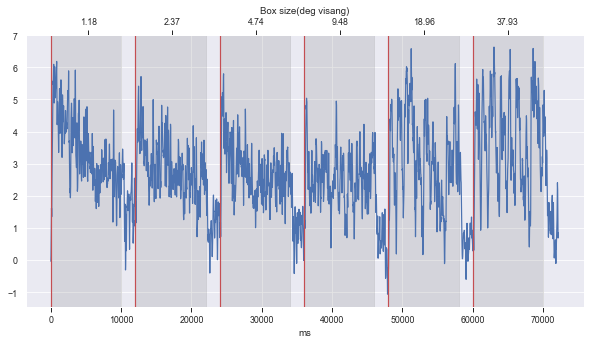

In [24]:
stat = stimphase_stat(traces[:, roi], avg_trig_times_ms, 50, linespeed, 
pause_dur = inter_phase_durMs, stat = np.std, avgd_over = 3, plot = True, inter_threshold = True,
percentdiff_threshold = 0.9)

In [109]:
print(stat)
print(counter_stat)
#print(np.isclose(stat, counter_stat))
if np.sum(np.abs(stat)) > np.sum(np.abs(counter_stat)):
    test = np.abs( 1 - np.divide(counter_stat, stat))
else:
    test = np.abs( 1 - np.divide(stat, counter_stat))
print("percentage diff")
print(test)
print("over trheshold?:")
print(test > 0.90)
np.all(test > 0.90)

[1.89278103 1.43594393 1.45706266 1.37873826 2.40808166 2.46642573]
[1.38724148 1.1379863  1.23955665 1.69470839 1.64347712 2.10534905]
percentage diff
[0.26708824 0.20749949 0.14927704 0.2291734  0.31751603 0.14639674]
over trheshold?:
[False False False False False False]


True

In [103]:
1 - 1.387241/1.8927810

0.2670884798611145

In [3]:
files = filehandling.find_files_in(".h5", r"D:\Igor analyses", recursive=True, search_terms = ['STAramp'])
print(*files, sep = "\n")

D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_B_0.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_G.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_R.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_1_STAramp_UV_0.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_B.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_G.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_R.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_2_STAramp_UV.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_B.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_G.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_R.h5
D:\Igor analyses\230323\2023-3-23_SMP_1_3_STAramp_UV.h5
D:\Igor analyses\230404\2023-4-4_SMP_1_1_STAramp_UV_0.h5
D:\Igor analyses\230502\2023-5-2_SMP_0_0_STAramp_R_0.h5
D:\Igor analyses\230502\2023-5-2_SMP_0_0_STAramp_UV_0.h5
D:\Igor analyses\230502\2023-5-2_SMP_0_1_STAramp_R_0.h5
D:\Igor analyses\230503\2023-5-3_SMP_0_0_STAramp_R_0.h5
D:\Igor analyses\230505\2023-5-5_SMP_0_3_STAramp_G.

In [7]:
conditions = [1.18, 2.37, 4.74, 9.48, 18.96, 37.93]
df_res = signal_analysis.stim_phase_df(files, conditions, 50, 3)
df_res


ValueError: All arrays must be of the same length

In [93]:
df_res.sort_values("stat_diff_abs")

,filename,colour,roi,condition,stat,stat_diff,stat_diff_abs
2542,2023-3-23_SMP_1_3_STAramp_G.h5,G,25,18.96,1.058614,-0.000023,0.000023
3266,2023-3-23_SMP_1_3_STAramp_UV.h5,UV,31,4.74,0.740657,-0.000058,0.000058
1014,2023-3-23_SMP_1_2_STAramp_B.h5,B,20,1.18,0.874701,-0.000064,0.000064
1503,2023-3-23_SMP_1_2_STAramp_R.h5,R,5,9.48,0.736935,-0.000094,0.000094
4558,2023-5-5_SMP_0_3_STAramp_G.h5,G,34,18.96,0.759481,0.000220,0.000220
...,...,...,...,...,...,...,...
4637,2023-5-5_SMP_0_3_STAramp_R.h5,R,10,37.93,2.543594,1.933327,1.933327
4597,2023-5-5_SMP_0_3_STAramp_R.h5,R,4,2.37,0.724303,-1.950536,1.950536
4197,2023-5-3_SMP_0_0_STAramp_R_0.h5,R,8,9.48,3.964837,2.182143,2.182143
4179,2023-5-3_SMP_0_0_STAramp_R_0.h5,R,5,9.48,3.605598,2.207343,2.207343


<Axes: xlabel='condition', ylabel='stat_diff'>

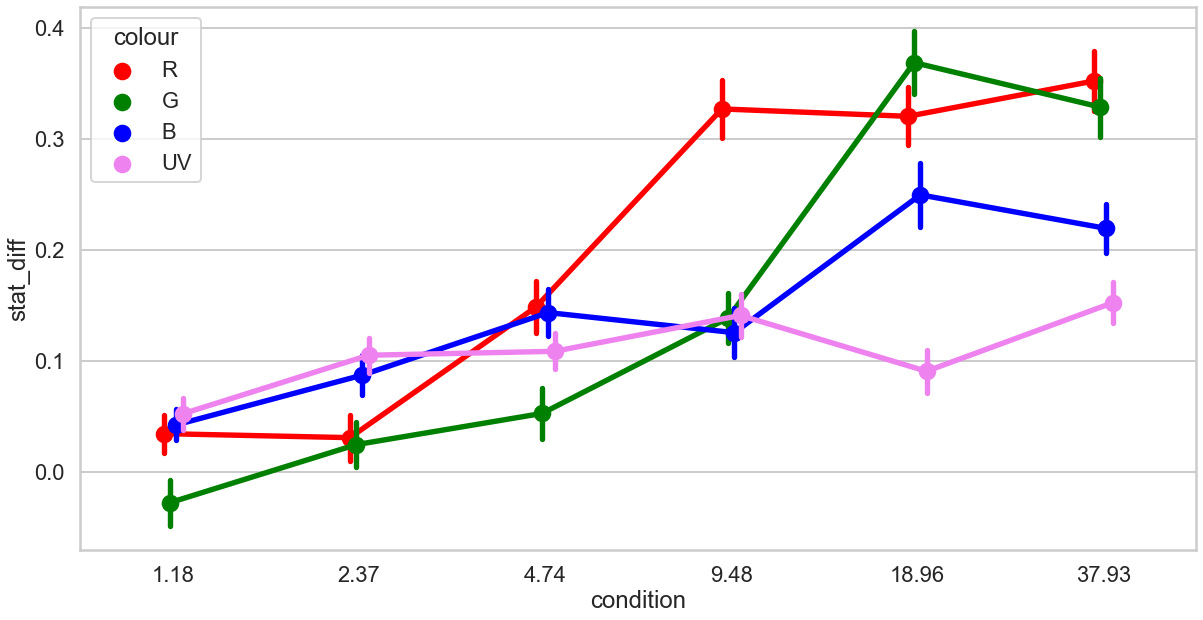

In [113]:
fig, ax = plt.subplots(1, figsize=(20,10))
chromatic_palette = ['red', 'green', "blue", 'violet']
chromatic_hues = ["R", "G", "B", "UV"]
# sns.pointplot(data = df_res, x = 'condition', y = "stat", hue = 'colour', 
#     hue_order = chromatic_hues, palette=chromatic_palette,
#      dodge=True,  errorbar="se", ax = ax[0])
# sns.pointplot(data = df_res, x = 'condition', y = "stat_diff_abs", hue = 'colour', 
#     hue_order = chromatic_hues, palette=chromatic_palette,
#      dodge=True,  errorbar="se", ax = ax[1])
sns.pointplot(data = df_res, x = 'condition', y = "stat_diff", hue = 'colour', 
    hue_order = chromatic_hues, palette=chromatic_palette,
     dodge=True,  errorbar="se", ax = ax)

Text(0, 0.5, 'STDev')

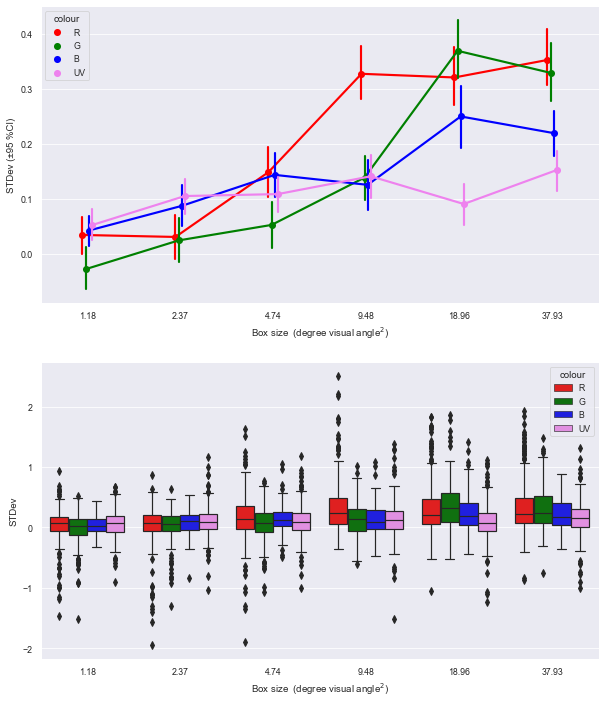

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))
chromatic_palette = ['red', 'green', "blue", 'violet']
chromatic_hues = ["R", "G", "B", "UV"]
sns.pointplot(data = df_res, x = 'condition', y = "stat", hue = 'colour', 
    hue_order = chromatic_hues, palette=chromatic_palette,
     dodge=True,  errorbar="ci", ax = ax[0])
sns.boxplot(data = df_res.query("stat == stat"), y = "stat", x = "condition",hue = 'colour', 
    hue_order = chromatic_hues, palette=chromatic_palette, ax = ax[1])
# ax.set_xticklabels([1.18, 2.37, 4.74, 9.48, 18.96, 37.93])
ax[0].set_xlabel("Box size  (degree visual angle$^2$)")
ax[0].set_ylabel("STDev (±95 %CI)")
ax[1].set_xlabel("Box size  (degree visual angle$^2$)")
ax[1].set_ylabel("STDev")

In [93]:
name_it = "Size tuning curve"
fig.savefig(rf"C:\Users\SimenLab\OneDrive\Universitet\PhD\Thesis committee\Report 2\{name_it}.svg")

In [ ]:
files = filehandling.find_files_in(".h5", r"D:\Igor analyses", recursive=True, search_terms = ['STAramp'])
print(files)
conditions = [1.18, 2.37, 4.74, 9.48, 18.96, 37.93]
df_res = signal_analysis.stim_phase_df(files, conditions, 50, 3, std_threshold = 1)

[WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_1_STAramp_B_0.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_1_STAramp_G.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_1_STAramp_R.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_1_STAramp_UV_0.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_2_STAramp_B.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_2_STAramp_G.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_2_STAramp_R.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_2_STAramp_UV.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_3_STAramp_B.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_3_STAramp_G.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_3_STAramp_R.h5'), WindowsPath('D:/Igor analyses/230323/2023-3-23_SMP_1_3_STAramp_UV.h5'), WindowsPath('D:/Igor analyses/230404/2023-4-4_SMP_1_1_STAramp_UV_0.h5'), WindowsPath('D:/Igor analyses/230502/2023-5-2_SMP_0_0_STAramp_R_0.h

KeyError: 'sta_threshold'

In [105]:
pd.unique(df_res["condition"])

array([ 1.18,  2.37,  4.74,  9.48, 18.96, 37.93])

In [106]:
df_res.query("condition == 37.93").describe()

,roi,condition,stat
count,837.000000,8.370000e+02,837.000000
mean,21.941458,3.793000e+01,1.254998
std,14.685463,7.109676e-15,0.503083
min,0.000000,3.793000e+01,0.379551
25%,10.000000,3.793000e+01,0.918027
50%,20.000000,3.793000e+01,1.134000
75%,32.000000,3.793000e+01,1.494964
max,65.000000,3.793000e+01,4.229381


Text(0, 0.5, 'STDev (±SE)')

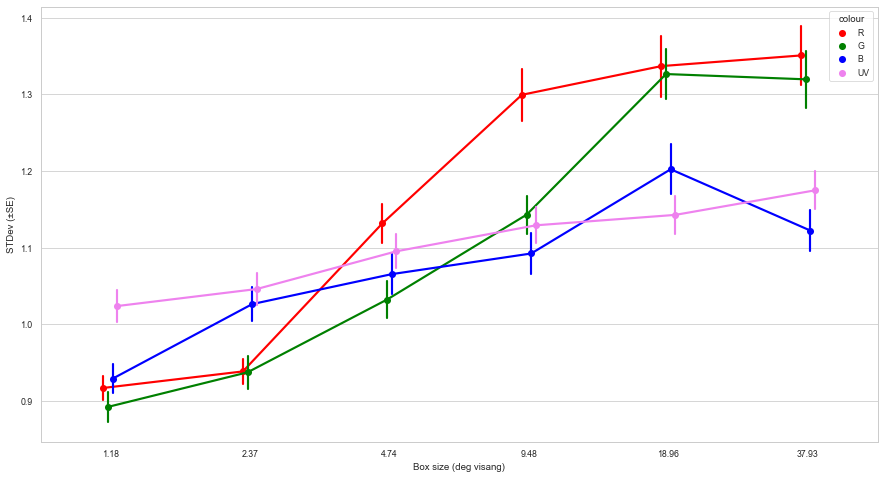

In [108]:
fig, ax = plt.subplots(figsize=(15,8))
chromatic_palette = ['red', 'green', "blue", 'violet']
chromatic_hues = ["R", "G", "B", "UV"]
ax = sns.pointplot(data = df_res, x = 'condition', y = "stat", hue = 'colour', dodge=True,
    errorbar="se",
    hue_order = chromatic_hues, palette=chromatic_palette)
# ax.set_xticklabels([1.18, 2.37, 4.74, 9.48, 18.96, 37.93])
ax.set_xlabel("Box size (deg visang)")
ax.set_ylabel("STDev (±SE)")

In [ ]:
len(pd.unique(df_res["filename"]))

array(['2023-3-23_SMP_1_1_STAramp_B_0.h5',
       '2023-3-23_SMP_1_1_STAramp_G.h5', '2023-3-23_SMP_1_1_STAramp_R.h5',
       '2023-3-23_SMP_1_1_STAramp_UV_0.h5',
       '2023-3-23_SMP_1_2_STAramp_B.h5', '2023-3-23_SMP_1_2_STAramp_G.h5',
       '2023-3-23_SMP_1_2_STAramp_R.h5',
       '2023-3-23_SMP_1_2_STAramp_UV.h5',
       '2023-3-23_SMP_1_3_STAramp_B.h5', '2023-3-23_SMP_1_3_STAramp_G.h5',
       '2023-3-23_SMP_1_3_STAramp_R.h5',
       '2023-3-23_SMP_1_3_STAramp_UV.h5',
       '2023-4-4_SMP_1_1_STAramp_UV_0.h5',
       '2023-5-2_SMP_0_0_STAramp_R_0.h5',
       '2023-5-2_SMP_0_0_STAramp_UV_0.h5',
       '2023-5-2_SMP_0_1_STAramp_R_0.h5',
       '2023-5-3_SMP_0_0_STAramp_R_0.h5', '2023-5-5_SMP_0_3_STAramp_G.h5',
       '2023-5-5_SMP_0_3_STAramp_R.h5', '2023-5-5_SMP_0_3_STAramp_UV.h5'],
      dtype=object)

In [116]:
traces.shape

(71978, 36)

In [62]:
# Determine, on average, when in the loop the trigger occurs
avg_trig_times = np.average(np.split(triggers_time, 3), axis = 0)
avg_trig_times = avg_trig_times - avg_trig_times[0] 
avg_trig_times_ms = np.round(avg_trig_times / linespeed, 0) # round so we get an integer index 
# Account for period of no stimulus 
inter_phase_durS = 2
inter_phase_durMs = np.round(2 / linespeed, 0).astype(int)
# Run on many cases 
result = signal_analysis.stimphase_stat_multi(traces, avg_trig_times_ms, 50, linespeed, pause_dur = inter_phase_durMs, stat = np.std, avgd_over = 3)

In [64]:
result

1.631723982800577

In [7]:
df = pd.DataFrame(result)
# df

In [133]:
df_res.query("colour == 'UV' & condition == 1.18")

,filename,colour,roi,condition,stat
666,2023-3-23_SMP_1_1_STAramp_UV_0.h5,UV,0,1.18,1.042120
672,2023-3-23_SMP_1_1_STAramp_UV_0.h5,UV,1,1.18,1.156422
678,2023-3-23_SMP_1_1_STAramp_UV_0.h5,UV,2,1.18,1.024696
684,2023-3-23_SMP_1_1_STAramp_UV_0.h5,UV,3,1.18,0.813347
690,2023-3-23_SMP_1_1_STAramp_UV_0.h5,UV,4,1.18,0.698462
...,...,...,...,...,...
4992,2023-5-5_SMP_0_3_STAramp_UV.h5,UV,31,1.18,0.797588
4998,2023-5-5_SMP_0_3_STAramp_UV.h5,UV,32,1.18,0.862786
5004,2023-5-5_SMP_0_3_STAramp_UV.h5,UV,33,1.18,0.668623
5010,2023-5-5_SMP_0_3_STAramp_UV.h5,UV,34,1.18,0.666297


In [134]:
len(df_res.query("colour == 'UV'"))/6

253.0